<a href="https://colab.research.google.com/github/juangross/cursoAM2021/blob/main/PDI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2)
  La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

**Observaciones**: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris. 

**Observaciones**: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.
Les sugiero no utilizar imágenes de más de 1000 X 1000 pixeles


**Parte 1**

In [2]:
!git clone https://github.com/juangross/cAM

Cloning into 'cAM'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


Cargo imagen de prueba


In [23]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import imageio as img
import numpy as np


# Import an image from directory:
path="./cAM/imagenes/"
archi="patron_RGBCMYWK"
archo="output"
archo2="output2"
ext="png"

#formato actual

print("leyendo archivo:", f"{path}{archi}.{ext}")
#input_image= mpimg.imread(f"{archi}.{ext}")  #lee con matplotlib
input_image=img.imread(f"{path}{archi}.{ext}")      #lee con imageio

#print ("imagen de entrada")
#plt.subplot(1,2,1)
#plt.imshow(input_image)

leyendo archivo: ./cAM/imagenes/patron_RGBCMYWK.png


In [24]:
input_tam=input_image.shape

print("Dimensiones (X,Y,canales): ", input_tam)
print("tipo de datos: " , input_image.dtype)

print("Datos en crudo: ")
#input_image[:]


Dimensiones (X,Y,canales):  (4, 16, 3)
tipo de datos:  uint8
Datos en crudo: 


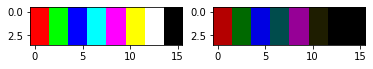

In [57]:
#creo un array nuevo pero vacío usando numpy
input_image_norm=np.zeros(input_tam, dtype=float)
#normalizo los valores correspondientes a cada canal RGB. haciendo: <valor color pixel>/256
#solamente se normaliza si el valor del color para ese canal es >0.

#normalizo la imagen
input_image_norm=1/255*input_image
#print(input_image_norm)
#print(input_image_norm.shape)

#transformo a YIQ
#me baso en esta explicación del producto matricial para hacer la conversión de bases
#https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
YIQ_image=np.zeros(input_tam, dtype=float)
YIQ_image_mod=np.zeros(input_tam, dtype=float)
RGB2YIQ=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]], dtype=float)


YIQ_image=np.dot(input_image_norm,RGB2YIQ.T.copy())
#print("imagen YIQ")
#print(YIQ_image)

#Genero los parámetros que voy a usar para alterar YIQ, en forma de una matriz, cada fila es una coordenada
#[[Y],
# [I],
# [Q]]
#K_YIQ=[-1,-1,1] #[Y,I,Q] coeficientes para alterar los canales
#K_YIQ=np.array([[-1,-.75,-.5,-.25,0.,0.25,0.5,0.75,1,1.25,1.5,1.75,2.0],
#                [-1,-.75,-.5,-.25,0.,0.25,0.5,0.75,1,1.25,1.5,1.75,2.0],
#                [-1,-.75,-.5,-.25,0.,0.25,0.5,0.75,1,1.25,1.5,1.75,2.0]])
K_YIQ=np.array([[-1,-.5,0.,0.5,1,1.5,2.0],
                [-1,-.5,0.,0.5,1,1.5,2.0],
                [-1,-.5,0.,0.5,1,1.5,2.0]])


#copio la imagen 
YIQ_image_mod = YIQ_image

#YIQ_image_mod[:,:,0] = YIQ_image[:,:,0]*K_YIQ[0]
#YIQ_image_mod[:,:,1] = YIQ_image[:,:,1]*K_YIQ[1]
#YIQ_image_mod[:,:,2] = YIQ_image[:,:,2]*K_YIQ[2]
i=2

YIQ_image_mod[:,:,0] = YIQ_image[:,:,0]*K_YIQ[0,i]
#YIQ_image_mod[:,:,1] = YIQ_image[:,:,1]*K_YIQ[1,i]
#YIQ_image_mod[:,:,2] = YIQ_image[:,:,2]*K_YIQ[2,i]


#print("imagen YIQ alterada: ")
#print(YIQ_image_mod)

#YIQ -> RGB normalizado
YIQ2RGB=np.array([[1,0.9663,0.6210 ],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]], dtype=float)
output_image_norm_RGB= np.dot(YIQ_image,YIQ2RGB.T.copy())
#print("imagen RGB alterada")
#output_image_norm_RGB

#desnormalizar RGB
output_image=255*output_image_norm_RGB
output_image=np.rint(output_image)  #redondeo a valores enteros
output_image=np.clip(output_image,0,255) #recorto los valores que superen 255
#output_image
#print(output_image)


#mostrar imagenes
fig,axes=plt.subplots(1,2)
#print ("imagen de entrada")
plt.subplot(1,2,1)
plt.imshow(input_image)

#imagen de salida
plt.subplot(1,2,2)
plt.imshow(output_image.astype('uint8'))
